# Customer Segmentation Clustering

In [350]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [351]:
data = pd.read_csv(r'C:\Users\mukes\Downloads\python projects\Clustering\marketing_campaign.csv', sep = '\t')
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [352]:
data.shape

(2240, 29)

So from above we have 2240 datapoints

## Data Cleaning and Feature Engineering

In [353]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Checking for any missing values

In [354]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

So we have 24 missing values so will drop those raws

In [355]:
data = data.dropna()

We have dropped 24 rows containing NA Values 

In [356]:
data.shape

(2216, 29)

In [357]:
import warnings

In the next step, I am going to create a feature out of "Dt_Customer" that indicates the number of days a customer is registered in the firm's database. However, in order to keep it simple, I am taking this value relative to the most recent customer in the record.

Thus to get the values I must check the newest and oldest recorded dates.

In [358]:
data['Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2216, dtype: object

In [359]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
dates = []
for i in data['Dt_Customer']:
    i = i.date()
    dates.append(i)
print("the newest customer's enrolment date in the records:", max(dates) )
print("the oldest customer's enrolment date in the records", min(dates))

the newest customer's enrolment date in the records: 2014-12-06
the oldest customer's enrolment date in the records 2012-01-08


C:\Users\mukes\AppData\Local\Temp\ipykernel_14576\1164329651.py:1: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
C:\Users\mukes\AppData\Local\Temp\ipykernel_14576\1164329651.py:1: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
C:\Users\mukes\AppData\Local\Temp\ipykernel_14576\1164329651.py:1: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
C:\Users\mukes\AppData\Local\Temp\ipykernel_14576\1164329651.py:1: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Dt_Customer'

Creating a feature ("Customer_For") of the number of days the customers started to shop in the store relative to the last recorded date

In [360]:
days = []
d1 = max(dates)
for i in dates:
    delta = d1 - i
    days.append(delta)
data['Customer_For'] = days
data['Customer_For'] = pd.to_numeric(data['Customer_For'], errors = 'coerce')


In [361]:
data['Customer_For'].head()

0    83894400000000000
1    10800000000000000
2    40780800000000000
3     5616000000000000
4    27734400000000000
Name: Customer_For, dtype: int64

In [362]:
print('Total categories in the feature Marital_Status:\n', data['Marital_Status'].value_counts(), '\n')
print('Total categories in the feature Education:\n', data['Education'].value_counts())

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In the next bit, I will be performing the following steps to engineer some new features:

Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.
Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.
Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.
Create a feature "Children" to indicate total children in a household that is, kids and teenagers.
To get further clarity of household, Creating feature indicating "Family_Size"
Create a feature "Is_Parent" to indicate parenthood status
Lastly, I will create three categories in the "Education" by simplifying its value counts.
Dropping some of the redundant features

In [363]:
#Feature Engineering
#Age of customer today 
data['Age'] = 2021-data['Year_Birth']

#Total spendings on various items
data['Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']


#Deriving living situation by marital status"Alone"
data['Living_with'] = data['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Absurd':'Alone',
                                                     'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone',
                                                     'Single':'Alone'})

#Feature indicating total children living in the household
data['Children'] = data['Kidhome'] + data['Teenhome']

#Feature for total members in the householde
data['Family_Size'] = data['Living_with'].replace({'Alone':1, 'Partner':2}) + data['Children']

#Feature pertaining parenthood
data['Is_parent'] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data['Education'] = data['Education'].replace({'Basic' : 'Undergraduate', '2n Cycle': 'Undergraduate', 
                                               'Graduation': 'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

#For clarity 
data = data.rename(columns = {"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat",
                   "MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})        


to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]

data = data.drop(to_drop, axis = 1)

In [364]:
data.head()

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0      Graduate  58138.0        0         0       58    635      88   546   
1      Graduate  46344.0        1         1       38     11       1     6   
2      Graduate  71613.0        0         0       26    426      49   127   
3      Graduate  26646.0        1         0       26     11       4    20   
4  Postgraduate  58293.0        1         0       94    173      43   118   

   Fish  Sweets  ...  AcceptedCmp2  Complain  Response       Customer_For  \
0   172      88  ...             0         0         1  83894400000000000   
1     2       1  ...             0         0         0  10800000000000000   
2   111      21  ...             0         0         0  40780800000000000   
3    10       3  ...             0         0         0   5616000000000000   
4    46      27  ...             0         0         0  27734400000000000   

   Age  Spent  Living_with  Children  Family_Size  Is_parent  
0   64   1617        Alone         0            1          0  
1   67     27        Alone         2            3          1  
2   56    776      Partner         0            2          0  
3   37     53      Partner         1            3          1  
4   40    422      Partner         1            3          1  

[5 rows x 30 columns]

In [365]:
data.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...   
mean     26.356047   166.995939    37.637635    27.028881    43.965253  ...   
std      39.793917   224.283273    54.752082    41.072046    51.815414  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       2.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    68.000000    12.000000     8.000000    24.500000  ...   
75%      33.000000   232.250000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   262.000000   321.000000  ...   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  Customer_For  \
count   2216.000000   2216.000000  2216.000000  2216.000000  2.216000e+03   
mean       0.064079      0.013538     0.009477     0.150271  4.423735e+16   
std        0.244950      0.115588     0.096907     0.357417  2.008532e+16   
min        0.000000      0.000000     0.000000     0.000000  0.000000e+00   
25%        0.000000      0.000000     0.000000     0.000000  2.937600e+16   
50%        0.000000      0.000000     0.000000     0.000000  4.432320e+16   
75%        0.000000      0.000000     0.000000     0.000000  5.927040e+16   
max        1.000000      1.000000     1.000000     1.000000  9.184320e+16   

               Age        Spent     Children  Family_Size    Is_parent  
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  
mean     52.179603   607.075361     0.947202     2.592509     0.714350  
std      11.985554   602.900476     0.749062     0.905722     0.451825  
min      25.000000     5.000000     0.000000     1.000000     0.000000  
25%      44.000000    69.000000     0.000000     2.000000     0.000000  
50%      51.000000   396.500000     1.000000     3.000000     1.000000  
75%      62.000000  1048.000000     1.000000     3.000000     1.000000  
max     128.000000  2525.000000     3.000000     5.000000     1.000000  

[8 rows x 28 columns]

In [366]:
data.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customer_For',
       'Age', 'Spent', 'Living_with', 'Children', 'Family_Size', 'Is_parent'],
      dtype='object')

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

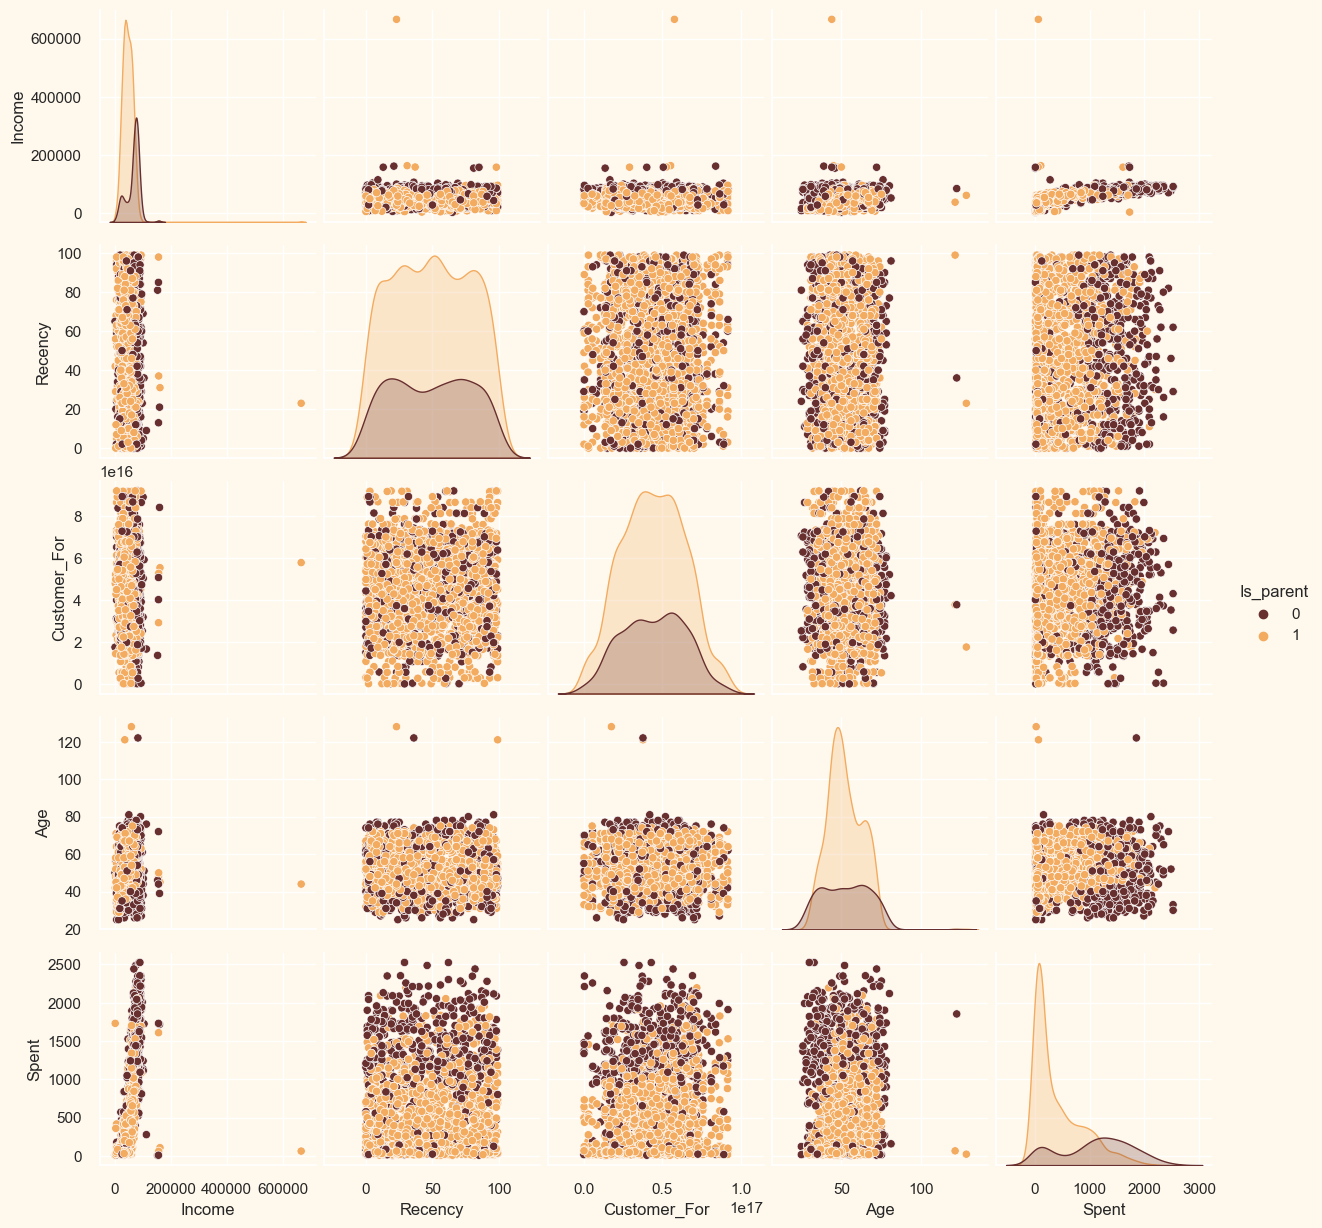

In [367]:
sns.set(rc = {'axes.facecolor':'#FFF9ED', 'figure.facecolor':'#FFF9ED'})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]

to_plot = ['Income', 'Recency', 'Customer_For', 'Age', 'Spent', 'Is_parent']
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[to_plot], hue = 'Is_parent', palette = (["#682F2F","#F3AB60"]))
plt.show()

let us look at the correlation amongst the features. (Excluding the categorical attributes at this point)

<AxesSubplot:>

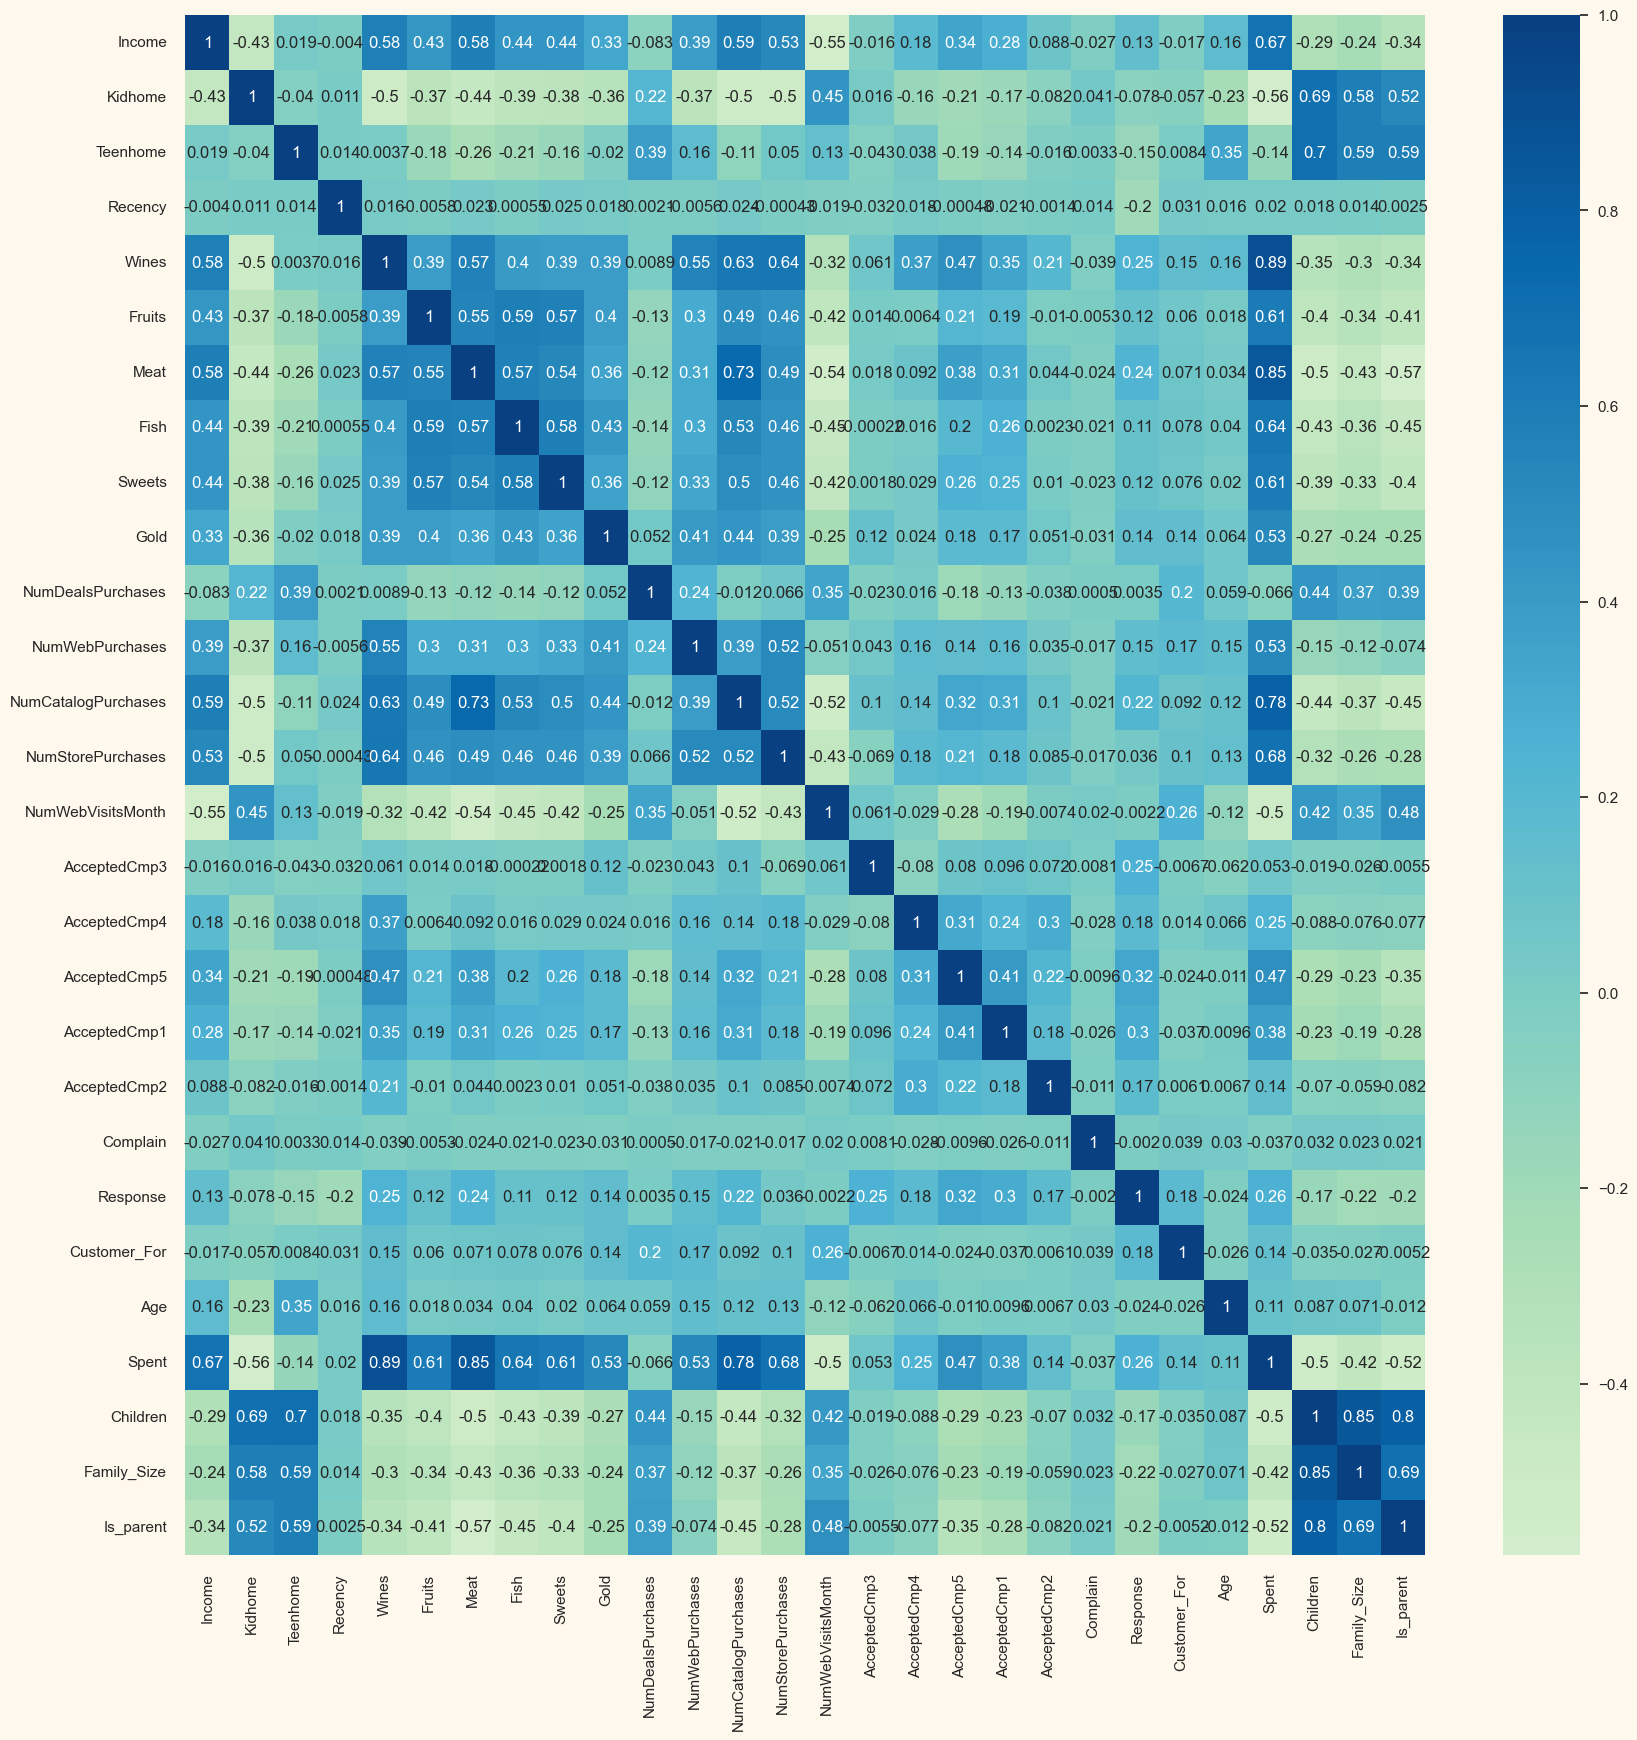

In [368]:
corrmat = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, cmap = 'GnBu', center = 0)

## Data Precprocessing

Extracting categorical features

In [369]:
categorical_feature = [feature for feature in data.columns if data[feature].dtypes == 'O']
categorical_feature

['Education', 'Living_with']

Label Encoding

In [370]:
from sklearn.preprocessing import LabelEncoder

In [371]:
lb = LabelEncoder()
for feature in categorical_feature:
    data[feature] = lb.fit_transform(data[feature])

In [372]:
data['Education'].head(), data['Living_with'].head()

(0    0
 1    0
 2    0
 3    0
 4    1
 Name: Education, dtype: int32,
 0    0
 1    0
 2    1
 3    1
 4    1
 Name: Living_with, dtype: int32)

In [373]:
new_data = data.copy()
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
new_data = new_data.drop(cols_del, axis = 1)

Standardizing the data

In [374]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_data)
scaled_data_dataframe = pd.DataFrame(scaled_data, columns = new_data.columns)
print('All features are now scaled')


All features are now scaled


In [375]:
scaled_data_dataframe.head()

Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.894187  0.234063 -0.823039 -0.928972  0.310532  0.978226  1.549429   
1  -0.894187 -0.234559  1.039938  0.909066 -0.380509 -0.872024 -0.637328   
2  -0.894187  0.769478 -0.823039 -0.928972 -0.795134  0.358511  0.569159   
3  -0.894187 -1.017239  1.039938 -0.928972 -0.795134 -0.872024 -0.561922   
4   0.569268  0.240221  1.039938 -0.928972  1.554407 -0.391671  0.418348   

       Meat      Fish    Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0  1.690227  2.454568  1.484827  ...             2.504712          -0.554143   
1 -0.717986 -0.651038 -0.633880  ...            -0.571082          -1.169518   
2 -0.178368  1.340203 -0.146821  ...            -0.229327           1.291982   
3 -0.655551 -0.504892 -0.585174  ...            -0.912837          -0.554143   
4 -0.218505  0.152766 -0.000703  ...             0.112428           0.061232   

   NumWebVisitsMonth  Customer_For       Age     Spent  Living_with  Children  \
0           0.693232      1.974875  0.986443  1.675488    -1.348829 -1.264803   
1          -0.131574     -1.665141  1.236801 -0.962358    -1.348829  1.405806   
2          -0.543978     -0.172132  0.318822  0.280250     0.741384 -1.264803   
3           0.280829     -1.923298 -1.266777 -0.919224     0.741384  0.070501   
4          -0.131574     -0.821827 -1.016420 -0.307044     0.741384  0.070501   

   Family_Size  Is_parent  
0    -1.758673  -1.581389  
1     0.450009   0.632356  
2    -0.654332  -1.581389  
3     0.450009   0.632356  
4     0.450009   0.632356  

[5 rows x 23 columns]

## DIMENSIONALITY REDUCTION WITH PCA

In [376]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(scaled_data_dataframe)
PCA_transform = pca.fit_transform(scaled_data)
pca_dataframe = pd.DataFrame(PCA_transform, columns = ['col1', 'col2', 'col3'])
pca_dataframe.describe().T


count          mean       std       min       25%       50%       75%  \
col1  2216.0 -4.488988e-17  2.849804 -5.872599 -2.488286 -0.793444  2.411769   
col2  2216.0  2.565136e-17  1.699090 -4.274799 -1.332751 -0.159986  1.222348   
col3  2216.0 -4.008025e-17  1.217966 -4.650114 -0.829949 -0.016057  0.804137   

           max  
col1  7.382215  
col2  6.115000  
col3  6.604585

Finding Eigen values

In [377]:
a, b, c = pca.explained_variance_
print('eigen values are:\n eigen_value_1: {}\n eigen_value_2: {}\n eigen_value_3: {}'.format(a, b, c))

eigen values are:
 eigen_value_1: 8.121380934757434
 eigen_value_2: 2.8869060932986885
 eigen_value_3: 1.4834403401907328


Finding Eigen Vectors

In [378]:
print('Eigen vectors are:')
a, b, c = pca.components_
a, b, c

Eigen vectors are:


(array([-0.0272555 ,  0.24259918, -0.24831822, -0.1032733 ,  0.0032756 ,
         0.25656257,  0.2414473 ,  0.28768732,  0.25176221,  0.23986174,
         0.19146448, -0.07903535,  0.16823926,  0.2790047 ,  0.24207029,
        -0.22538283,  0.03001269,  0.03630382,  0.32216633, -0.02786499,
        -0.25301047, -0.22397018, -0.24667731]),
 array([-0.05366194,  0.15330062,  0.00846443,  0.45292117,  0.01898985,
         0.20746803,  0.02573324,  0.01304502,  0.01604546,  0.03699198,
         0.14551699,  0.36752168,  0.30952402,  0.10838267,  0.20913418,
         0.06968667,  0.12052954,  0.20691178,  0.13911491,  0.12743197,
         0.33510676,  0.34447164,  0.29371182]),
 array([ 0.04943948, -0.21515214,  0.0392086 , -0.18654864, -0.00176161,
         0.07934936, -0.01723023, -0.0415562 , -0.0128007 , -0.01413491,
         0.16470659,  0.29859898,  0.23913998, -0.03074657,  0.01248893,
         0.45628198,  0.55652235, -0.26823059,  0.03983023, -0.27277715,
        -0.10742145, -0.23

PCA 3D visualization

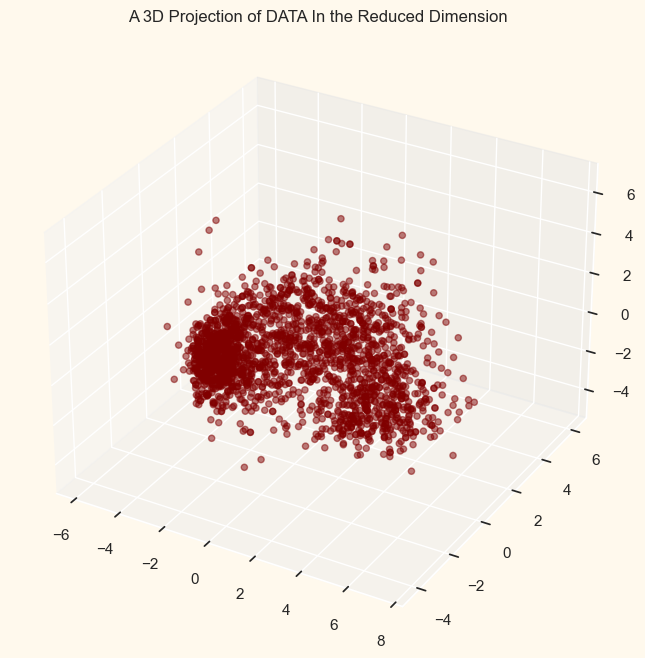

In [379]:
x = pca_dataframe['col1']
y = pca_dataframe['col2']
z = pca_dataframe['col3']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, z, c = 'maroon', marker = 'o', alpha=0.5)
ax.set_title('A 3D Projection of DATA In the Reduced Dimension')
plt.show()

# CLUSTERING

In [380]:
from sklearn.cluster import KMeans

Finding best K cluster with Elbow method using yellowbrick visualization

Elbow method to determine the number of clusters to be formed:



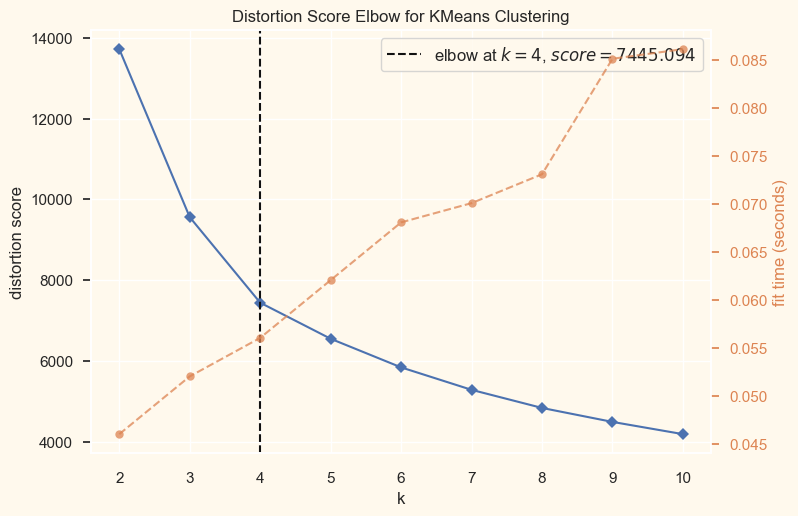

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [381]:
print('Elbow method to determine the number of clusters to be formed:\n')
from yellowbrick.cluster import KElbowVisualizer
Elbow_M = KElbowVisualizer(KMeans(), k = 10)
Elbow_M.fit(pca_dataframe)
Elbow_M.show()


Finding Best number of K clusters by matplotlib visualization

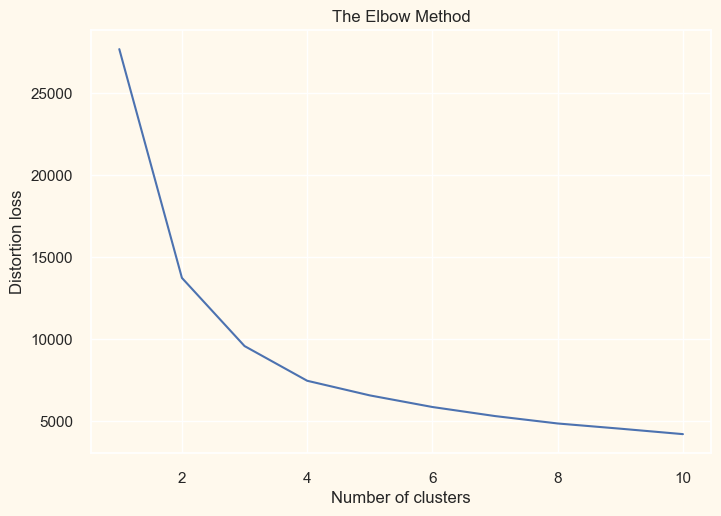

In [382]:
distortion_loss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init = 'k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_dataframe)
    distortion_loss.append(kmeans.inertia_)
plt.plot(range(1, 11), distortion_loss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion loss')
plt.show()

KMeans 3D visualization

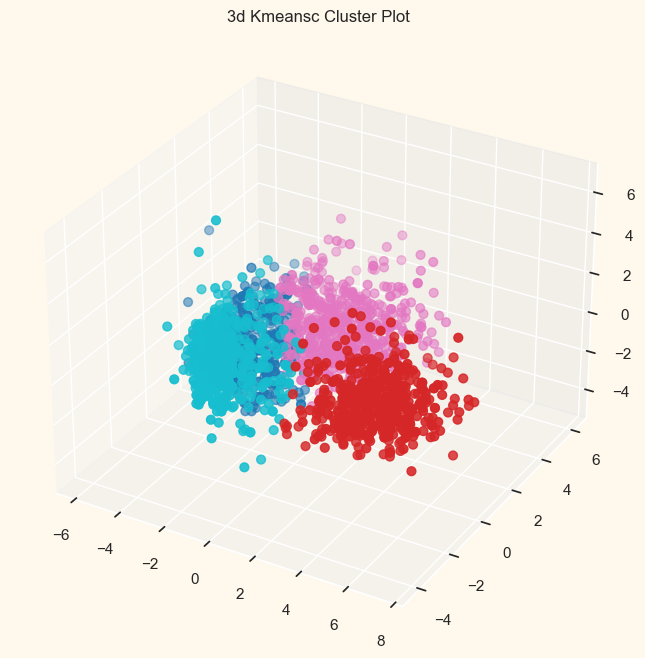

In [383]:
model = KMeans(n_clusters=4)
y_pred = model.fit_predict(pca_dataframe)
pca_dataframe['Clusters_1'] = y_pred
data['Clusters_1'] = y_pred


fig = plt.figure(figsize = (10, 8))
ax = plt.subplot(111, projection = '3d', label = 'bla')
ax.scatter(x, y, z, s = 40, c = KMeans(n_clusters=4).fit_predict(pca_dataframe), marker = 'o', cmap = 'tab10')
ax.set_title('3d Kmeansc Cluster Plot')
plt.show()

# Agglomerative Clustering

In [384]:
from sklearn.cluster import AgglomerativeClustering

In [385]:
model = AgglomerativeClustering(n_clusters=4)
y_pred = model.fit_predict(pca_dataframe)
pca_dataframe['Clusters'] = y_pred
data['Clusters'] = y_pred

Agglomerative Clustering visualization

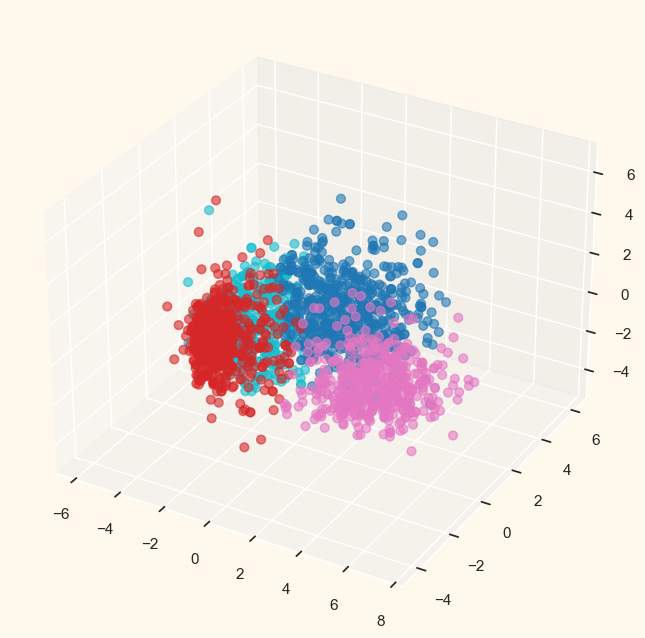

In [386]:
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection = '3d', label = 'bla')
ax.scatter(x, y, z, s =40, c= pca_dataframe['Clusters'], marker='o', cmap = 'tab10', alpha = 0.6)

## Heirarchical Clustering

Types of linkages:
1. Single Linkage: For two clusters R and S, the single linkage returns the minimum distance between two points i and j such that i belongs to R and j belongs to S.
2. Complete Linkage: For two clusters R and S, the complete linkage returns the maximum distance between two points i and j such that i belongs to R and j belongs to S.
3. Average Linkage: For two clusters R and S, first for the distance between any data-point i in R and any data-point j in S and then the arithmetic mean of these distances are calculated. Average Linkage returns this value of the arithmetic mean.

Text(0, 0.5, 'Euclidean distances')

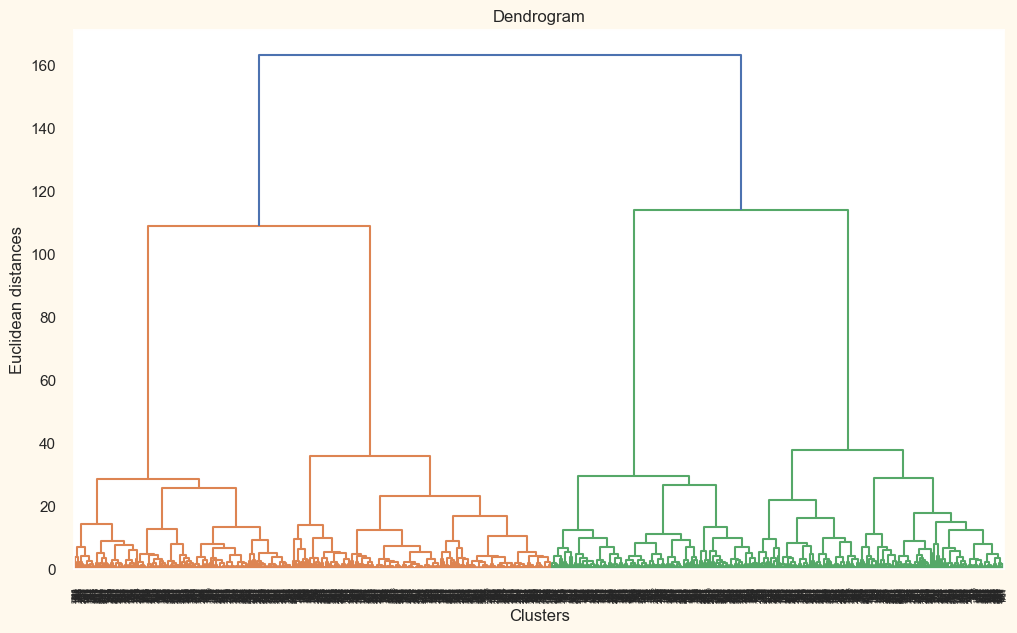

In [387]:
from scipy.cluster import hierarchy as sch


plt.figure(figsize=(12, 7))
dendrogram = sch.dendrogram(sch.linkage(pca_dataframe, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distances')

So We have 2 Clusters

## Evaluating Models

Agglomerative Clusters Distribution

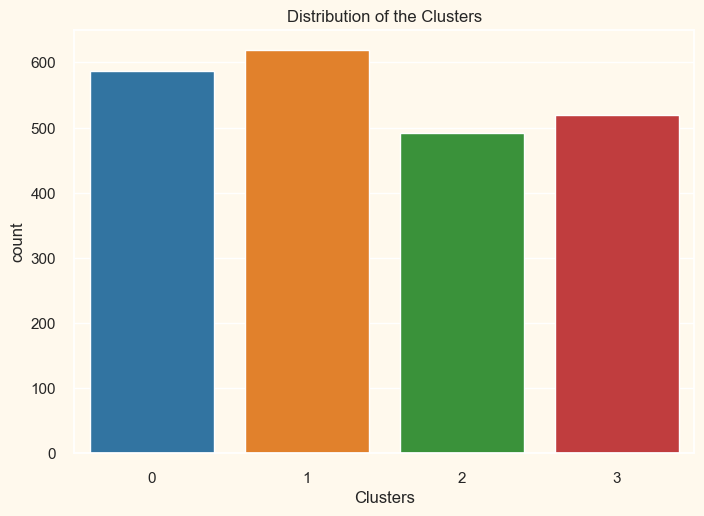

In [388]:
model_dist_agm = sns.countplot(x = data['Clusters'], palette='tab10')
model_dist_agm.set_title('Distribution of the Clusters')
plt.show()

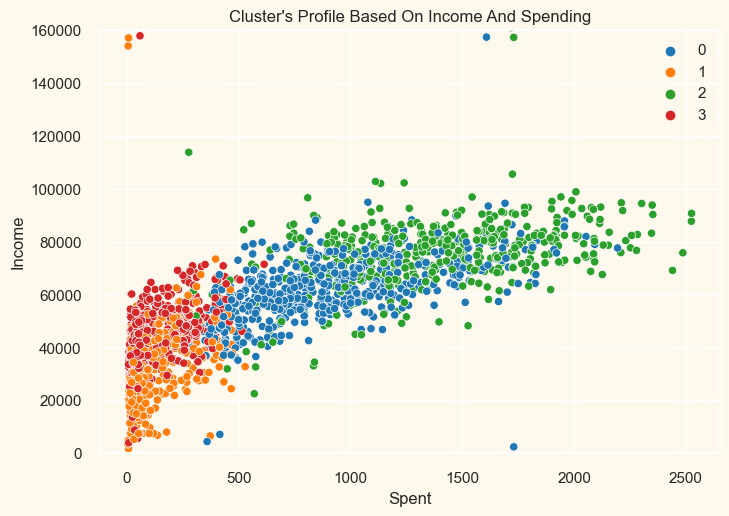

In [389]:
model_dist_agm = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= 'tab10')
model_dist_agm.set_title("Cluster's Profile Based On Income And Spending")
plt.ylim(0, 160000)
plt.legend()
plt.show()

C:\Users\mukes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:1296: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mukes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:1296: UserWarning: 71.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mukes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mukes\AppData\Local\Packages\Pyt

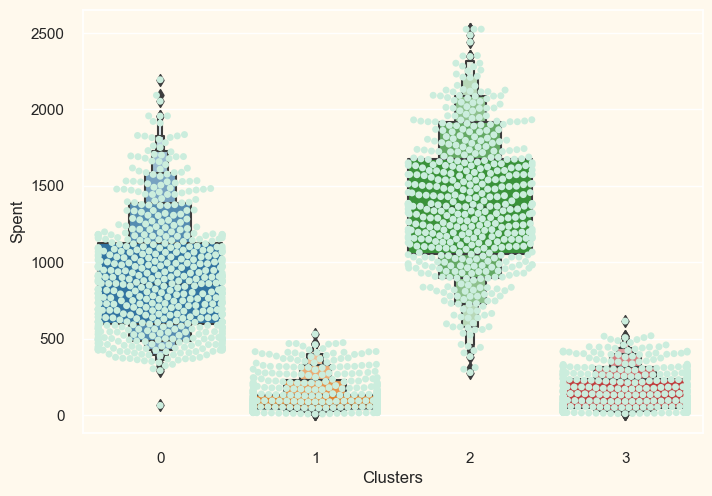

In [390]:
plt.figure()
model_dist_agm = sns.swarmplot(x=data['Clusters'], y = data['Spent'], color='#CBEDDD')
model_dist_agm = sns.boxenplot(x=data['Clusters'], y = data['Spent'], palette='tab10')
plt.show()

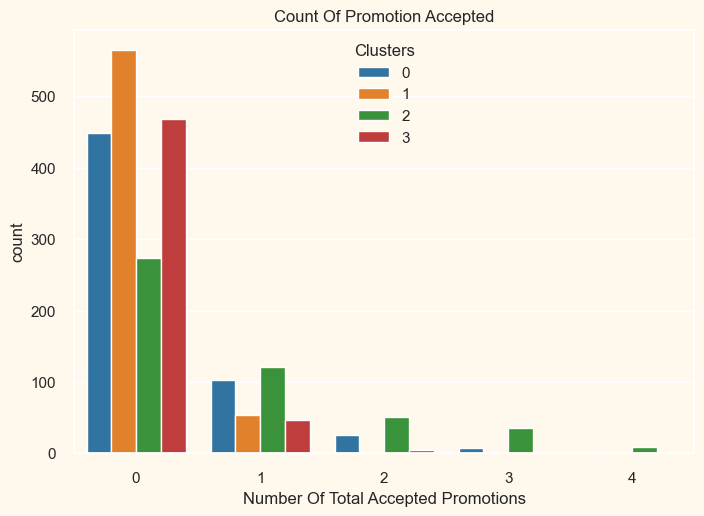

In [391]:
data['Total_Promo'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']
plt.figure()
model_agm = sns.countplot(x = data['Total_Promo'], hue = data['Clusters'], palette='tab10')
model_agm.set_title("Count Of Promotion Accepted")
model_agm.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

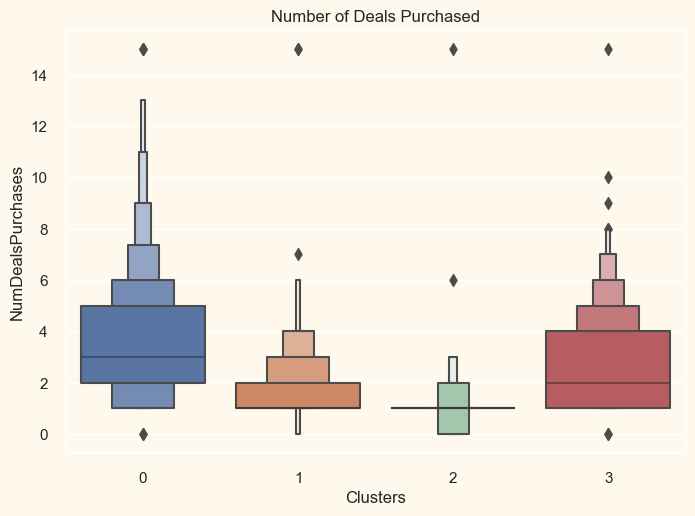

In [392]:
plt.figure()
model_agm = sns.boxenplot(y=data['NumDealsPurchases'], x = data['Clusters'])
model_agm.set_title('Number of Deals Purchased')
plt.show()

K-Means Clusters Distribution

Text(0.5, 1.0, 'Distribution of Kmeans clusters')

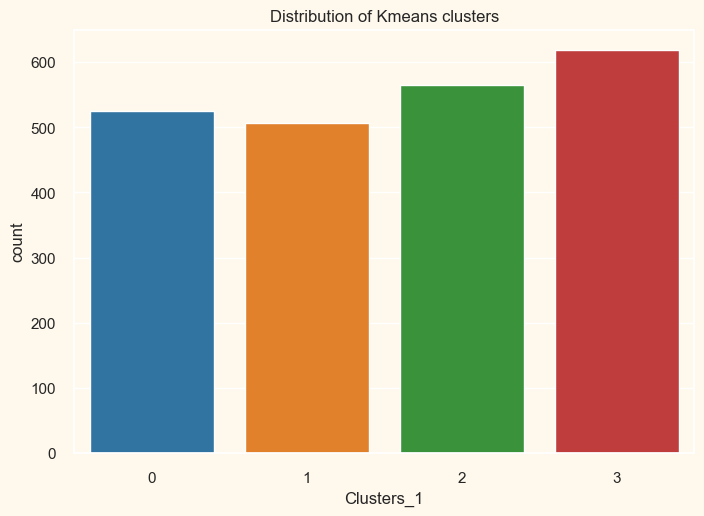

In [393]:
model_dist_KM = sns.countplot(x = data['Clusters_1'], palette='tab10')
model_dist_KM.set_title('Distribution of Kmeans clusters')

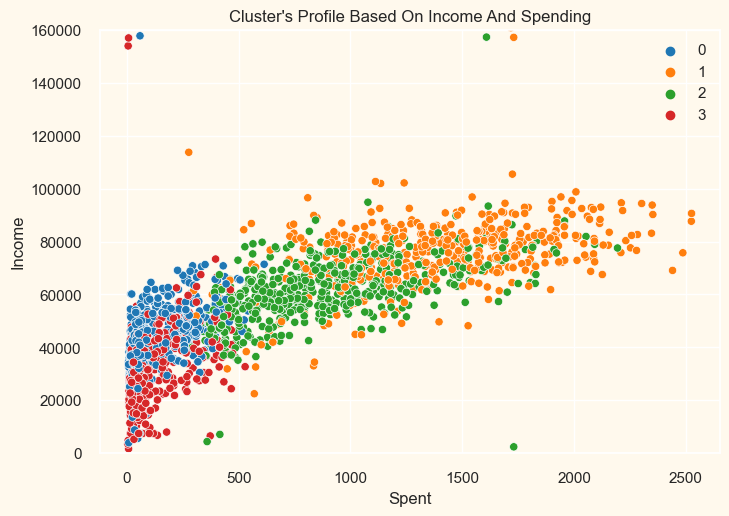

In [394]:
model_dist_agm = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters_1"], palette= 'tab10')
model_dist_agm.set_title("Cluster's Profile Based On Income And Spending")
plt.ylim(0, 160000)
plt.legend()
plt.show()

C:\Users\mukes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:1296: UserWarning: 64.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mukes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:1296: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mukes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:1296: UserWarning: 26.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mukes\AppData\Local\Packages\Pyt

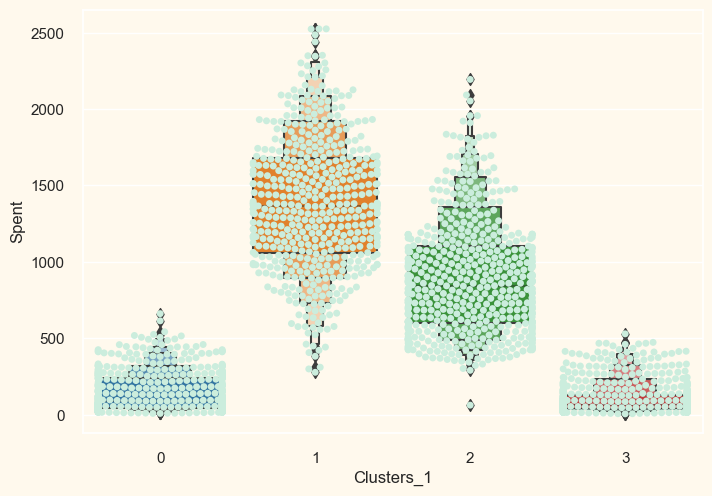

In [395]:
plt.figure()
model_dist_KM = sns.swarmplot(x=data['Clusters_1'], y = data['Spent'], color='#CBEDDD')
model_dist_KM = sns.boxenplot(x=data['Clusters_1'], y = data['Spent'], palette='tab10')
plt.show()

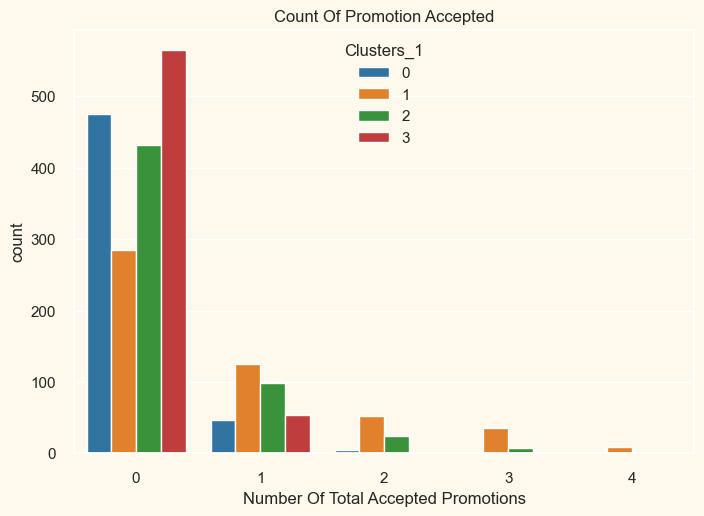

In [396]:
data['Total_Promo'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']
plt.figure()
model_KM = sns.countplot(x = data['Total_Promo'], hue = data['Clusters_1'], palette='tab10')
model_KM.set_title("Count Of Promotion Accepted")
model_KM.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

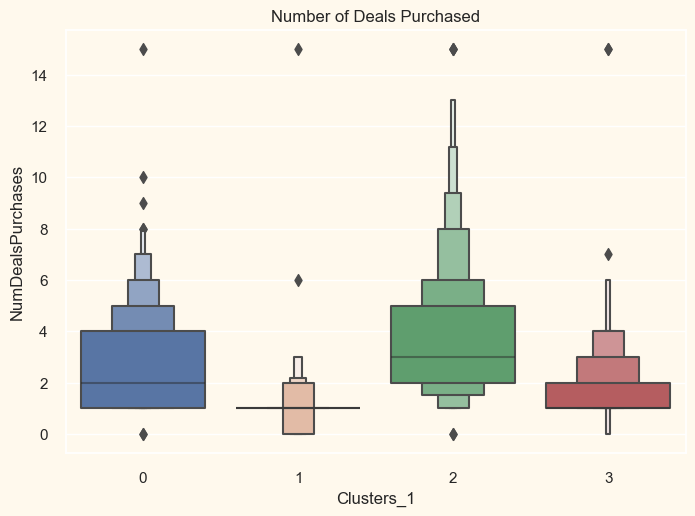

In [397]:
plt.figure()
model_KM = sns.boxenplot(y=data['NumDealsPurchases'], x = data['Clusters_1'])
model_KM.set_title('Number of Deals Purchased')
plt.show()

<Figure size 800x550 with 0 Axes>

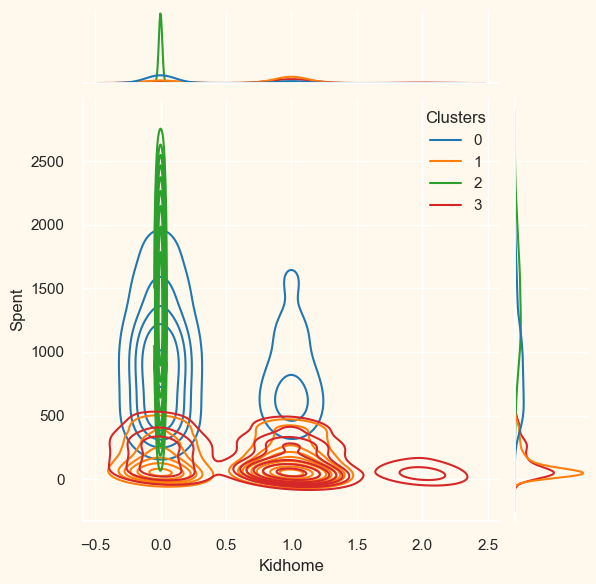

C:\Users\mukes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 800x550 with 0 Axes>

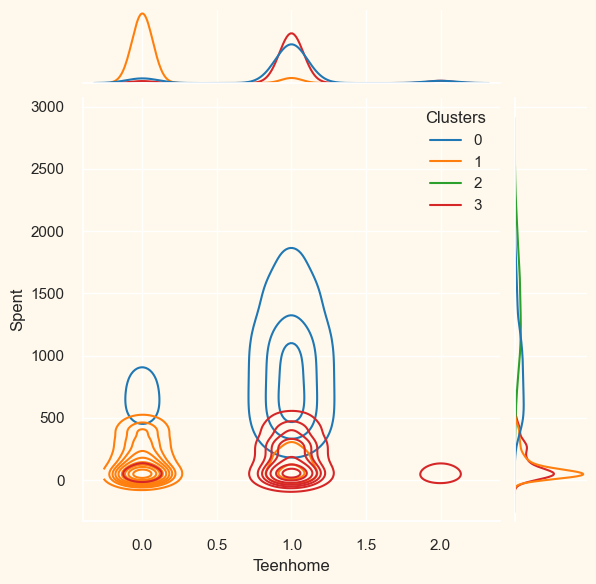

<Figure size 800x550 with 0 Axes>

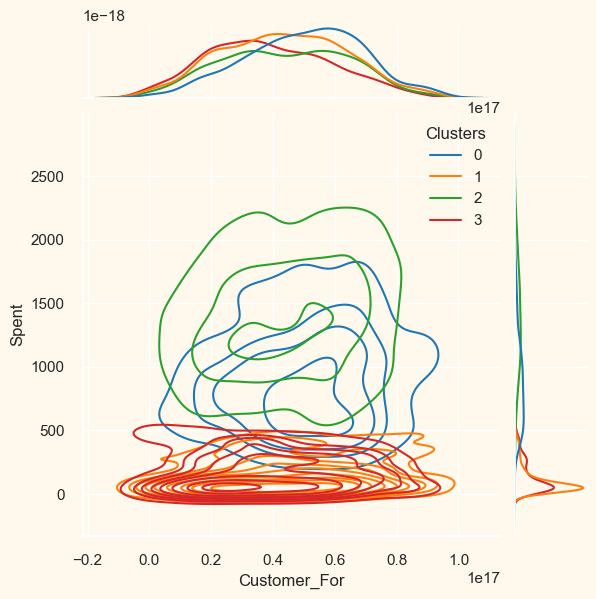

<Figure size 800x550 with 0 Axes>

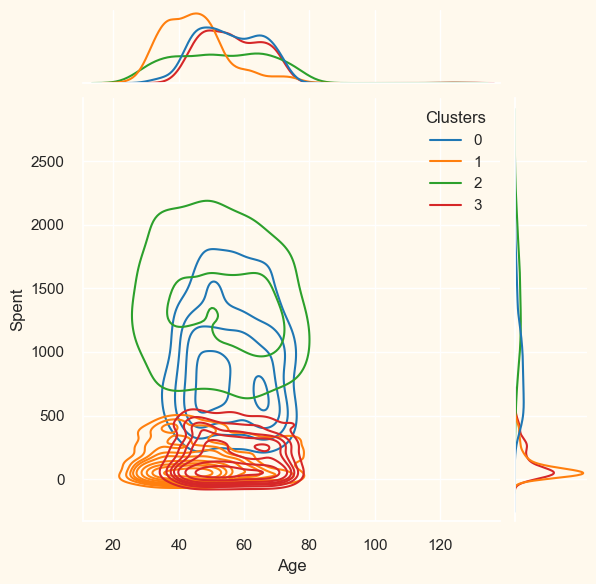

<Figure size 800x550 with 0 Axes>

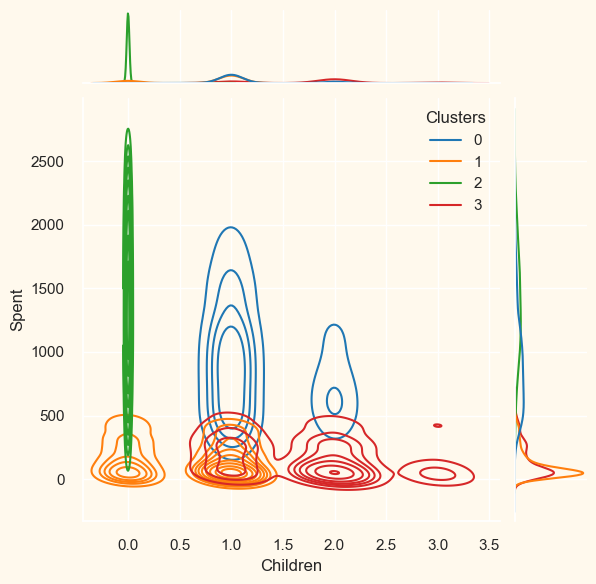

<Figure size 800x550 with 0 Axes>

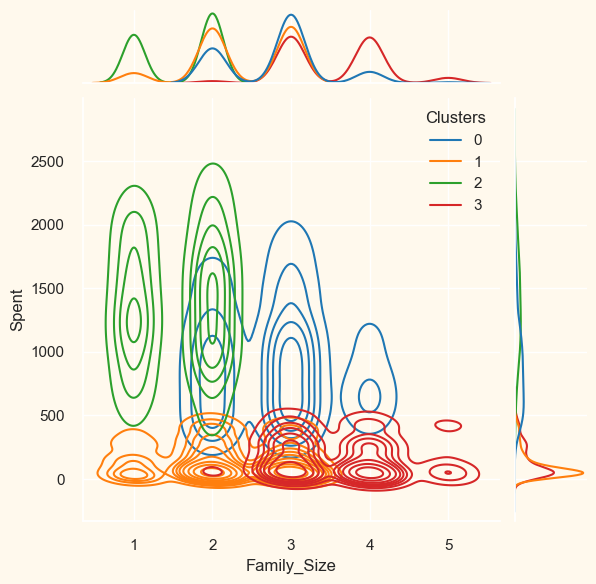

C:\Users\mukes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 800x550 with 0 Axes>

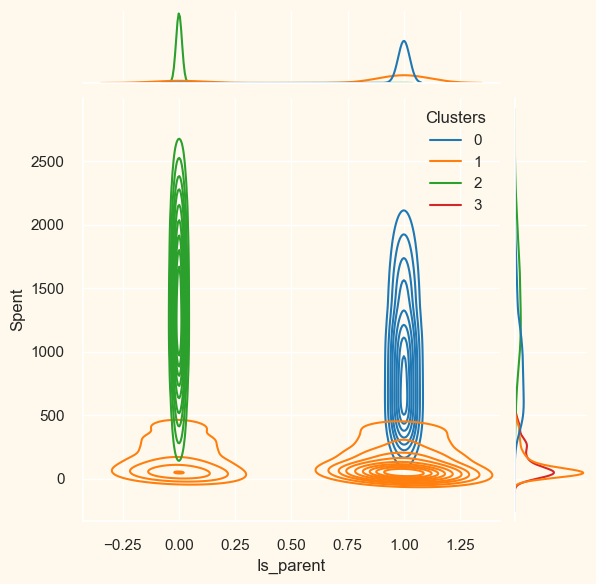

<Figure size 800x550 with 0 Axes>

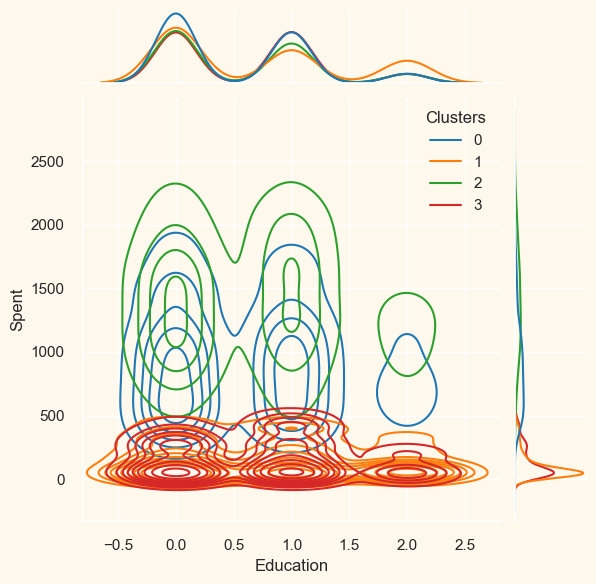

<Figure size 800x550 with 0 Axes>

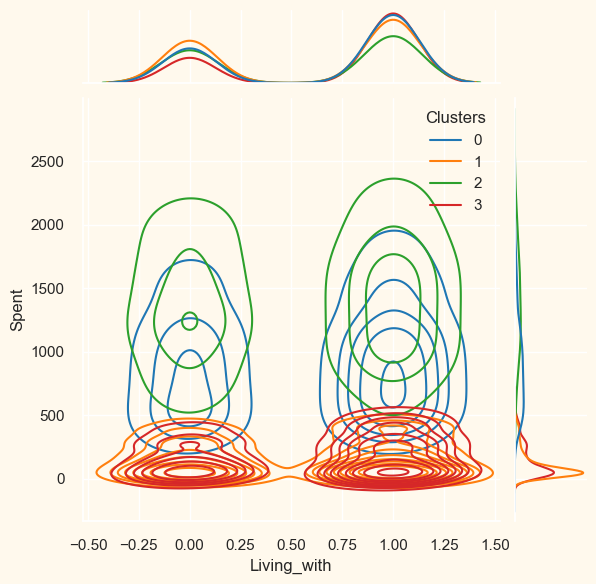

In [400]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age",
             "Children", "Family_Size", "Is_parent", "Education","Living_with"]

for i in Personal:
    plt.figure()
    sns.jointplot(x = data[i], y = data['Spent'], hue = data['Clusters'], kind = 'kde', palette='tab10')
    plt.show()